# Classification - 2

## Naive Bayes with Multiple Labels

In [44]:
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets

wine = datasets.load_wine()

In [4]:
print('Features: ', wine.feature_names)

print('Labels: ', wine.target_names)

Features:  ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Labels:  ['class_0' 'class_1' 'class_2']


In [5]:
wine.data.shape

(178, 13)

In [6]:
from sklearn.model_selection import train_test_split

In [35]:
x_train, x_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.3, random_state=50)

In [36]:
from sklearn.naive_bayes import GaussianNB

In [37]:
model = GaussianNB()

model.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [38]:
y_pred = model.predict(x_test)

In [39]:
from sklearn import metrics

metrics.accuracy_score(y_test, y_pred)

0.9814814814814815

In [41]:
accuracy = []

for i in range(1,100):
    x_train, x_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.3, random_state=i)
    model = GaussianNB()
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy.append(metrics.accuracy_score(y_test, y_pred))

In [42]:
accuracy

[0.9814814814814815,
 0.9629629629629629,
 0.9629629629629629,
 0.9814814814814815,
 0.9444444444444444,
 1.0,
 1.0,
 0.9629629629629629,
 0.9814814814814815,
 0.8888888888888888,
 0.9444444444444444,
 0.9444444444444444,
 0.9814814814814815,
 1.0,
 0.9814814814814815,
 1.0,
 1.0,
 0.9814814814814815,
 0.9629629629629629,
 0.9814814814814815,
 0.9814814814814815,
 0.9629629629629629,
 1.0,
 0.9629629629629629,
 0.9814814814814815,
 0.9814814814814815,
 1.0,
 0.9629629629629629,
 0.9629629629629629,
 1.0,
 0.9629629629629629,
 0.9814814814814815,
 1.0,
 0.9814814814814815,
 0.9629629629629629,
 1.0,
 0.9259259259259259,
 1.0,
 1.0,
 1.0,
 0.9444444444444444,
 1.0,
 0.9814814814814815,
 0.9444444444444444,
 0.9814814814814815,
 0.9629629629629629,
 0.9629629629629629,
 1.0,
 0.9629629629629629,
 0.9814814814814815,
 0.9444444444444444,
 0.9444444444444444,
 0.9629629629629629,
 1.0,
 0.9444444444444444,
 1.0,
 1.0,
 0.9814814814814815,
 1.0,
 1.0,
 0.9814814814814815,
 0.9444444444444444

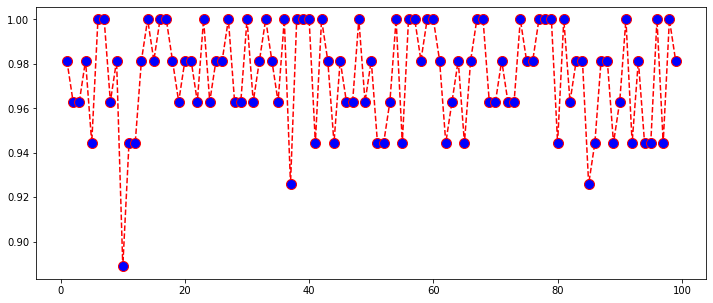

In [46]:
plt.figure(figsize=(12, 5))
plt.plot(range(1,100), accuracy, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)

plt.show()

## Decision Tree

In [47]:
import pandas as pd

from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split

from sklearn import metrics

In [48]:
col_names = ['pregnant','glucose','bp','skin','insulin','bmi','pedigree','age','label']

df = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/diabetes.csv', header=None, names=col_names)

In [49]:
df.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 769 entries, 0 to 768
Data columns (total 9 columns):
pregnant    769 non-null object
glucose     769 non-null object
bp          769 non-null object
skin        769 non-null object
insulin     769 non-null object
bmi         769 non-null object
pedigree    769 non-null object
age         769 non-null object
label       769 non-null object
dtypes: object(9)
memory usage: 54.1+ KB


In [ ]:
#col_names = ['pregnant','glucose','bp','skin','insulin','bmi','pedigree','age','label']

for col in col_names:
    df[col] = pd.to_numeric(df[col], errors='coarse')

In [55]:
df.dropna(inplace=True)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 1 to 768
Data columns (total 9 columns):
pregnant    768 non-null float64
glucose     768 non-null float64
bp          768 non-null float64
skin        768 non-null float64
insulin     768 non-null float64
bmi         768 non-null float64
pedigree    768 non-null float64
age         768 non-null float64
label       768 non-null float64
dtypes: float64(9)
memory usage: 60.0 KB


In [59]:
feature_names = ['pregnant','glucose','bp','skin','insulin','bmi','pedigree','age']

x = df[feature_names]
y = df.label

In [60]:
x.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age
1,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0
2,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0
3,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0
4,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0
5,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0


In [61]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [62]:
dtClassifier = DecisionTreeClassifier()

dtClassifier = dtClassifier.fit(x_train, y_train)

y_pred = dtClassifier.predict(x_test)

In [63]:
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.7012987012987013


## Random Forest

In [64]:
from sklearn import datasets

iris = datasets.load_iris()

In [65]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [66]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [67]:
iris.data[0:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [68]:
iris.target[0:5]

array([0, 0, 0, 0, 0])

In [69]:
import pandas as pd

data = pd.DataFrame({
    'sepal length':iris.data[:,0],
    'sepal width':iris.data[:,1],
    'petal length':iris.data[:,2],
    'petal width':iris.data[:,3],
    'species':iris.target
})

data.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [81]:
from sklearn.model_selection import train_test_split

x = data[['sepal length', 'sepal width','petal length', 'petal width']]
y = data['species']

x_train, y_train, x_test, y_test = train_test_split(x, y, test_size=0.3)

In [83]:
from sklearn.ensemble import RandomForestClassifier

rfClassifier = RandomForestClassifier()

rfClassifier = rfClassifier.fit(x_train, y_train)

y_pred = rfClassifier.predict(x_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ValueError: Unknown label type: 'continuous-multioutput'

In [84]:
y

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
      ..
120    2
121    2
122    2
123    2
124    2
125    2
126    2
127    2
128    2
129    2
130    2
131    2
132    2
133    2
134    2
135    2
136    2
137    2
138    2
139    2
140    2
141    2
142    2
143    2
144    2
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int32

## SVM

In [85]:
import pandas as pd
import numpy as np

In [89]:
df = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/Final_Dataset/train.csv')

In [90]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [91]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


Ada missing value di beberapa data karena data count berbeda-beda

In [92]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [93]:
df.fillna(df.mean(), inplace=True)
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [94]:
df.Gender.fillna(df.Gender.mode()[0], inplace=True)

df.Married.fillna(df.Married.mode()[0], inplace=True)

df.Dependents.fillna(df.Dependents.mode()[0], inplace=True)

df.Self_Employed.fillna(df.Self_Employed.mode()[0], inplace=True)

In [95]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [96]:
df_clean = df.drop('Loan_ID', 1)

df_clean.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [137]:
X = df_clean.drop('Loan_Status', 1)
Y = df.Loan_Status

In [138]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban


In [139]:
Y.head()

0    Y
1    N
2    Y
3    Y
4    Y
Name: Loan_Status, dtype: object

In [140]:
X = pd.get_dummies(x)

In [141]:
X.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,146.412162,360.0,1.0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.000000,360.0,1.0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0
2,3000,0.0,66.000000,360.0,1.0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.000000,360.0,1.0,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.000000,360.0,1.0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1


In [105]:
from sklearn.model_selection import train_test_split

In [142]:
X_train, Y_train, X_test, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [143]:
print(X.shape)
print(Y.shape)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(614, 20)
(614,)
(429, 20)
(185, 20)
(429,)
(185,)


In [117]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn import metrics

LRmodel = LogisticRegression()
LRmodel.fit(x_train, y_train)

y_pred = LRmodel.pred(x_test)

metrics.accuracy_score(y_test, y_pred)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


ValueError: bad input shape (185, 20)

Error karena jumlah data berbeda